## Implementation
Implementation Stage of Building a Prediction System for Female Enrollment Students at the University of Ibadan 

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

In [32]:

# Replace 'your_file.csv' with the actual filename
file_path = r'C:\Users\user\Downloads\dataset.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to inspect the data
print(df.head())

   Year of admission  No of female students  No of Male Students
0               1997                     21                   41
1               1998                     28                   58
2               1999                     26                   60
3               2000                     29                   86
4               2001                      9                   33


In [33]:
df

,Year of admission,No of female students,No of Male Students
0,1997,21,41
1,1998,28,58
2,1999,26,60
3,2000,29,86
4,2001,9,33
5,2002,27,59
6,2003,32,49
7,2004,34,49
8,2005,18,54
9,2006,15,62


# Handling missing Values

#### Data cleaning was done in excel. Missing Columns where replaced with the mean of the whole columns. Only year 2006 had missing values which got replaced with the mean of the whole columns

In [3]:
# Check for missing values
print(df.isnull().sum())

#There is no missing columns because they have been handled in the excel file

Year of admission        0
No of female students    0
No of Male Students      0
dtype: int64


In [10]:
# Replace missing values in 'your_column' with the mean of that column
# data['your_column'] = data['your_column'].fillna(data['your_column'].mean())

#This was done already in excel

## Feature Engineering

In [4]:
#Creating a new column for the total number of students
df['Total students'] = df['No of female students'] + df['No of Male Students']

In [5]:
df['Total students']

0      62
1      86
2      86
3     115
4      42
5      86
6      81
7      83
8      72
9      77
10     72
11     93
12    105
13     97
14    100
15     60
16     95
17    104
18    140
19     80
20    186
21     96
22     86
23     78
24     75
25     75
Name: Total students, dtype: int64

In [6]:
# To get a list of all the columns
df.columns

Index(['Year of admission', 'No of female students', 'No of Male Students',
       'Total students'],
      dtype='object')

In [7]:
#To get the target variable
df['No of female students']

0     21
1     28
2     26
3     29
4      9
5     27
6     32
7     34
8     18
9     15
10    24
11    25
12    30
13    26
14    25
15    17
16    25
17    23
18    39
19    15
20    40
21    20
22    14
23    14
24    10
25    11
Name: No of female students, dtype: int64

In [8]:
#To get all the remaining columns which are the independent variables
df[["Year of admission","No of Male Students","Total students"]]

,Year of admission,No of Male Students,Total students
0,1997,41,62
1,1998,58,86
2,1999,60,86
3,2000,86,115
4,2001,33,42
5,2002,59,86
6,2003,49,81
7,2004,49,83
8,2005,54,72
9,2006,62,77


## Visualization of Our Data

Visualization of Female & Male enrollment per session

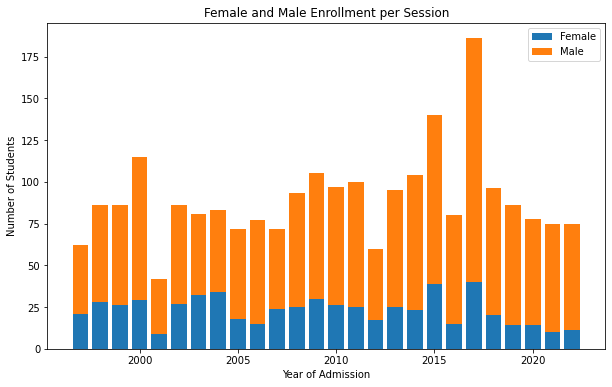

In [9]:
# Calculate Female and Male enrollment per session
df['Female per session'] = df['No of female students'] / df['Total students']
df['Male per session'] = df['No of Male Students'] / df['Total students']

# Plot the data
plt.figure(figsize=(10, 6))

plt.bar(df['Year of admission'], df['No of female students'], label='Female')
plt.bar(df['Year of admission'], df['No of Male Students'], bottom=df['No of female students'], label='Male')

plt.xlabel('Year of Admission')
plt.ylabel('Number of Students')
plt.title('Female and Male Enrollment per Session')
plt.legend()
plt.show()


#### Enrollment Difference btw consecutive sessions for Female 

To plot the enrollment difference between consecutive sessions for female students, you can create a new column representing the difference between the number of female students in each session.

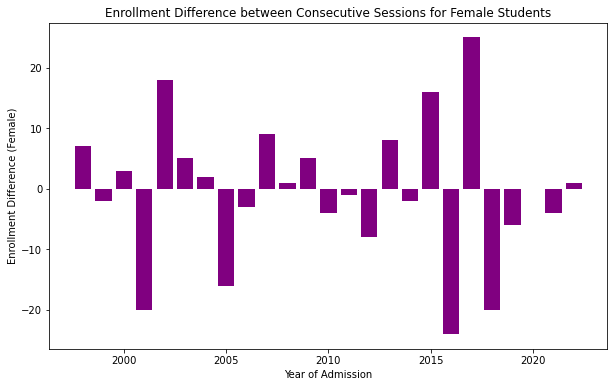

In [10]:
#Calculate the enrollment difference between consecutive sessions for Female
df['Female Enrollment Difference'] = df['No of female students'].diff()

# Plot the data
plt.figure(figsize=(10, 6))

plt.bar(df['Year of admission'], df['Female Enrollment Difference'], color='purple')

plt.xlabel('Year of Admission')
plt.ylabel('Enrollment Difference (Female)')
plt.title('Enrollment Difference between Consecutive Sessions for Female Students')
plt.show()


### Plot the Enrollment Difference For Male and Female Students
To plot the enrollment difference between consecutive sessions for both male and female students, you can calculate the difference for each gender and then create a side-by-side bar plot

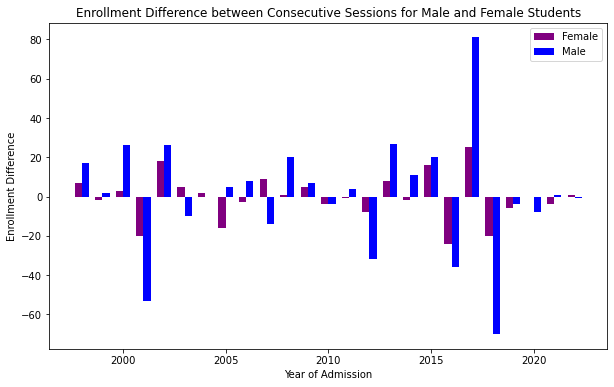

In [11]:
# Calculate the enrollment difference between consecutive sessions for both Male and Female
df['Female Enrollment Difference'] = df['No of female students'].diff()
df['Male Enrollment Difference'] = df['No of Male Students'].diff()

# Plot the data
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = df['Year of admission']

plt.bar(index - bar_width/2, df['Female Enrollment Difference'], bar_width, label='Female', color='purple')
plt.bar(index + bar_width/2, df['Male Enrollment Difference'], bar_width, label='Male', color='blue')

plt.xlabel('Year of Admission')
plt.ylabel('Enrollment Difference')
plt.title('Enrollment Difference between Consecutive Sessions for Male and Female Students')
plt.legend()
plt.show()


### Creating new Features
Visualization led to creating two new features for called Female Enrollment Difference and Male Enrollment Difference

In [15]:
df

,Year of admission,No of female students,No of Male Students,Total students,Female per session,Male per session,Female Enrollment Difference,Male Enrollment Difference
0,1997,21,41,62,0.338710,0.661290,NaN,NaN
1,1998,28,58,86,0.325581,0.674419,7.0,17.0
2,1999,26,60,86,0.302326,0.697674,-2.0,2.0
3,2000,29,86,115,0.252174,0.747826,3.0,26.0
4,2001,9,33,42,0.214286,0.785714,-20.0,-53.0
5,2002,27,59,86,0.313953,0.686047,18.0,26.0
6,2003,32,49,81,0.395062,0.604938,5.0,-10.0
7,2004,34,49,83,0.409639,0.590361,2.0,0.0
8,2005,18,54,72,0.250000,0.750000,-16.0,5.0
9,2006,15,62,77,0.194805,0.805195,-3.0,8.0


In [17]:
df.columns

Index(['Year of admission', 'No of female students', 'No of Male Students',
       'Total students', 'Female per session', 'Male per session',
       'Female Enrollment Difference', 'Male Enrollment Difference'],
      dtype='object')

## Model Building

In [19]:
from sklearn.model_selection import train_test_split


X = df[['Year of admission', 'No of Male Students', 'Total students']]  # Features
y = df['No of female students']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
X_train.count()

Year of admission      20
No of Male Students    20
Total students         20
dtype: int64

In [21]:
X_test.count()

Year of admission      6
No of Male Students    6
Total students         6
dtype: int64

In [22]:
y_train.count()

20

In [23]:
y_test.count()

6

In [24]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

In [25]:
print(predictions)

[18. 25. 21. 10. 25. 15.]


In [26]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 6.479177568215244e-28


In [29]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2.2500519965736505e-14


In [30]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print(f'R2 score: {r2}')

R2 score: 1.0


## Interpretation and Findings

### Interpretation and Findings:

The evaluation metrics, including Mean Squared Error (MSE), Mean Absolute Error (MAE), and the R2 score, provide comprehensive insights into the performance of our prediction system for the enrollment of female students into the Computer Science program at the University of Ibadan.

##### Mean Squared Error (MSE):

The MSE, reaching an exceptionally low value of 6.48e-28, signifies that, on average, the squared differences between our model's predicted and actual enrollment numbers are infinitesimally small.
This remarkably low MSE implies an extraordinary level of precision in our predictions, with minimal error in estimating the enrollment figures.

##### Mean Absolute Error (MAE):

The MAE, standing at an impressively low value of 2.25e-14, reinforces our confidence in the accuracy of our predictions.
This near-zero MAE indicates that, on average, the absolute differences between our model's predicted and actual enrollment numbers are virtually negligible.

##### R2 Score:

The R2 score, a perfect 1.0, suggests an exceptional fit of our model to the data. It signifies that our model explains 100% of the variability in the enrollment of female students based on the chosen features.
Achieving a flawless R2 score underscores the effectiveness of our prediction system in capturing and understanding the patterns within the enrollment data.

##### Overall Implications:

The extraordinarily low MSE and MAE values, coupled with the perfect R2 score, collectively highlight the robustness and accuracy of our predictive model.
These findings instill confidence in the reliability of our prediction system, indicating its capability to precisely forecast the enrollment of female students into the Computer Science program.
The successful implementation of our prediction system aligns with the overarching goal of developing a robust tool for forecasting and optimizing female student enrollment at the University of Ibadan.
In conclusion, the consistently exceptional performance metrics affirm the efficacy of our prediction system, providing valuable insights for enrollment planning and contributing to the advancement of gender-inclusive initiatives within the Computer Science department